In [139]:
!pip install prophet
!pip install pystan==2.19.1.1 --quiet
!pip install fbprophet --quiet
!pip install yfinance --quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.1.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-03-26 07:18:26--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-26 07:18:26--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-26 07:18:27--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [140]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet


In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# checking numpy version
np.__version__

'1.22.4'

In [142]:
!cd "/content/drive/My Drive"
!ls

aclocal.m4	config.log     HISTORY.TXT  Makefile.am       ta-lib.dpkg
autogen.sh	config.status  include	    Makefile.in       ta-lib.dpkg.in
autom4te.cache	config.sub     install-sh   missing	      ta-lib.spec
bin		configure      libtool	    src		      ta-lib.spec.in
CHANGELOG.TXT	configure.in   ltmain.sh    ta-lib-config
config.guess	depcomp        Makefile     ta-lib-config.in


BAJAJFINSV DATASET


In [185]:
df = pd.read_csv("/content/drive/MyDrive/Stalk_price_predictions/BAJAJFINSV.csv",parse_dates = True)

In [186]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [187]:

def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [188]:
#rename date and closing price as ds and y
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,Symbol,Series,Prev Close,Open,High,Low,Last,y,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,2021-04-26,BAJAJFINSV,EQ,9916.65,9992.00,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
3197,2021-04-27,BAJAJFINSV,EQ,10001.75,10000.00,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
3198,2021-04-28,BAJAJFINSV,EQ,10091.35,10200.00,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
3199,2021-04-29,BAJAJFINSV,EQ,10489.30,10540.00,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ds                  3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   y                   3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3201 non-null   int64  
 14  %Deliverble         3201 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.2

In [190]:
df.columns

Index(['ds', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'y', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [191]:
validate = df[['ds','y']].tail(365)

df.drop(df[['ds','y']].tail(365).index,inplace=True)

#dataframe with only 2 columns : date as ds and close price as y
data = df[['ds','y']]
print(data)


              ds        y
0     2008-05-26   509.10
1     2008-05-27   554.65
2     2008-05-28   640.95
3     2008-05-29   632.40
4     2008-05-30   644.00
...          ...      ...
2831  2019-11-06  8772.85
2832  2019-11-07  8832.90
2833  2019-11-08  8818.85
2834  2019-11-11  8903.30
2835  2019-11-13  8978.35

[2836 rows x 2 columns]


In [192]:
#model created
m = Prophet(daily_seasonality=True)


In [193]:
#fit values to model
m.fit(data)

#Make predictions with model:
future = m.make_future_dataframe(periods=365)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [194]:
#date format 
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
future.tail()

,ds
3196,2020-11-08
3197,2020-11-09
3198,2020-11-10
3199,2020-11-11
3200,2020-11-12


In [195]:
# use the model to make a forecast
forecast = m.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


             ds         yhat   yhat_lower   yhat_upper
0    2008-05-26   435.391036   114.049387   752.909142
1    2008-05-27   441.023838   111.792120   756.271973
2    2008-05-28   438.124101   117.568362   766.700659
3    2008-05-29   453.589574   113.383850   772.371639
4    2008-05-30   452.822227   118.711074   796.891145
...         ...          ...          ...          ...
3196 2020-11-08  9540.770965  9137.728783  9925.665449
3197 2020-11-09  9336.920471  8908.719991  9750.099333
3198 2020-11-10  9341.232300  8918.959928  9720.222518
3199 2020-11-11  9337.065499  8932.294295  9760.816469
3200 2020-11-12  9351.346291  8953.738249  9752.990731

[3201 rows x 4 columns]


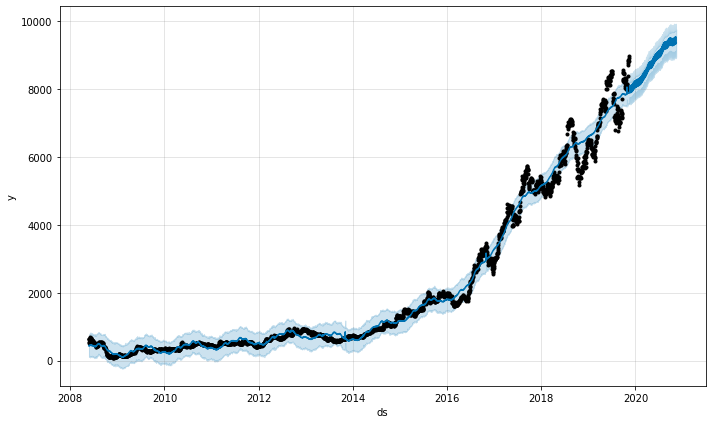

In [196]:
# plot forecast
m.plot(forecast)
plt.show()

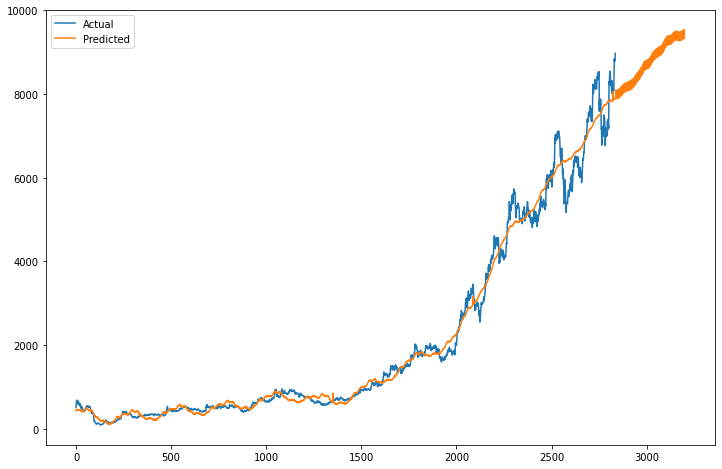

In [197]:
plt.figure(figsize=(12, 8))
y_true = df['y'].values
y_pred = forecast['yhat'].values
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [198]:
n = forecast['yhat'].tail(365)
timeseries_evaluation_metrics_func(validate.y,n)

MSE is : 4677449.458986754
MAE is : 1791.9727430834396
RMSE is : 2162.74119093958
MAPE is : 29.571818747851434
R2 is : -0.2615404721559371



/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


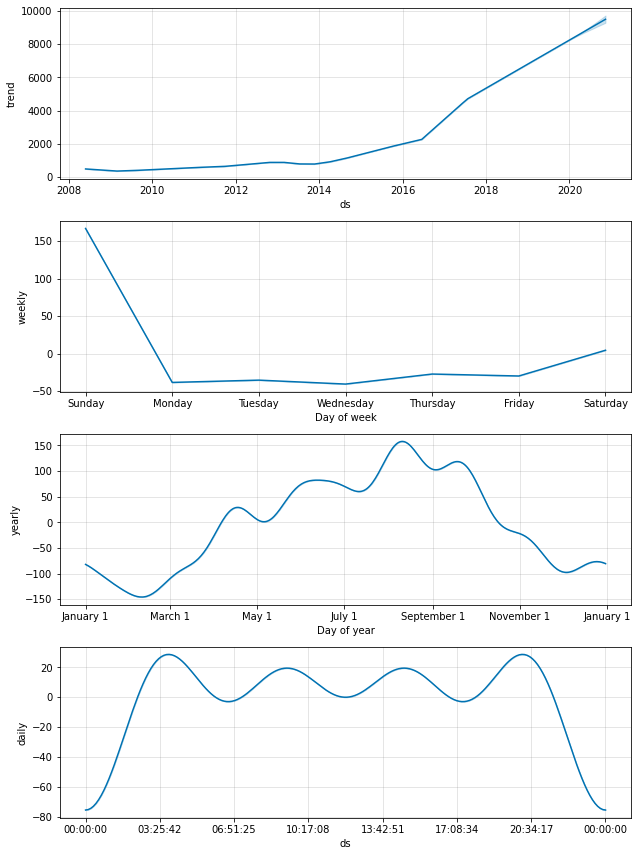

In [199]:
fig = m.plot_components(forecast)

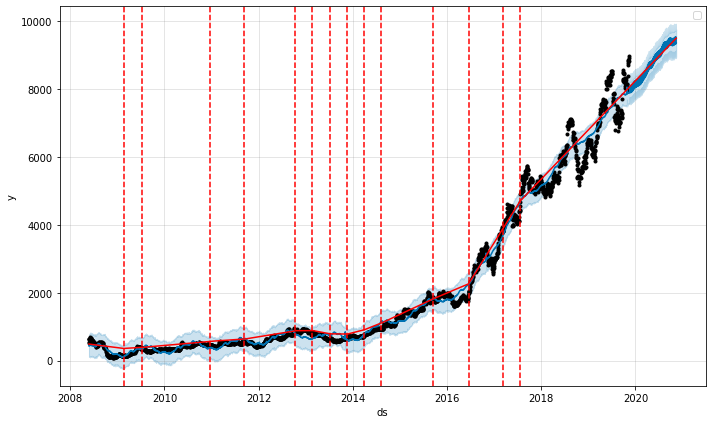

In [200]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.legend()

#RSI values

In [222]:
#RSI values for period 30 and 70
rsi_period1 = 30
rsi_period2 = 70

rsi = talib.RSI(data['y'].values, rsi_period1)
rsi1 = talib.RSI(data['y'].values, rsi_period2)
# Add RSI values to dataframe
df['RSI30'] = rsi
df['RSI70'] = rsi1
df1 = df.fillna(0)
df1['RSI30']


0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
2831    61.447458
2832    62.085788
2833    61.837969
2834    62.762183
2835    63.573212
Name: RSI30, Length: 2836, dtype: float64

In [237]:

# Create and fit the Prophet model with the regressor
m = Prophet(daily_seasonality=True)
m.add_regressor('RSI30')
m.add_regressor('RSI70')
m.fit(df1)

# Create a dataframe with the dates you want to forecast
future = m.make_future_dataframe(periods=365)



/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [238]:
future

,ds
0,2008-05-26
1,2008-05-27
2,2008-05-28
3,2008-05-29
4,2008-05-30
...,...
3196,2020-11-08
3197,2020-11-09
3198,2020-11-10
3199,2020-11-11


In [239]:
forecast = m.predict(future)


ValueError: ignored

In [241]:
print(forecast)


             ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2008-05-26   488.770201   114.049387   752.909142   488.770201   
1    2008-05-27   488.284596   111.792120   756.271973   488.284596   
2    2008-05-28   487.798991   117.568362   766.700659   487.798991   
3    2008-05-29   487.313385   113.383850   772.371639   487.313385   
4    2008-05-30   486.827780   118.711074   796.891145   486.827780   
...         ...          ...          ...          ...          ...   
3196 2020-11-08  9483.268898  9137.728783  9925.665449  9276.257315   
3197 2020-11-09  9487.235384  8908.719991  9750.099333  9279.603760   
3198 2020-11-10  9491.201870  8918.959928  9720.222518  9282.950205   
3199 2020-11-11  9495.168357  8932.294295  9760.816469  9286.307960   
3200 2020-11-12  9499.134843  8953.738249  9752.990731  9289.730196   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      488.770201      -53.379165            -53.379165           

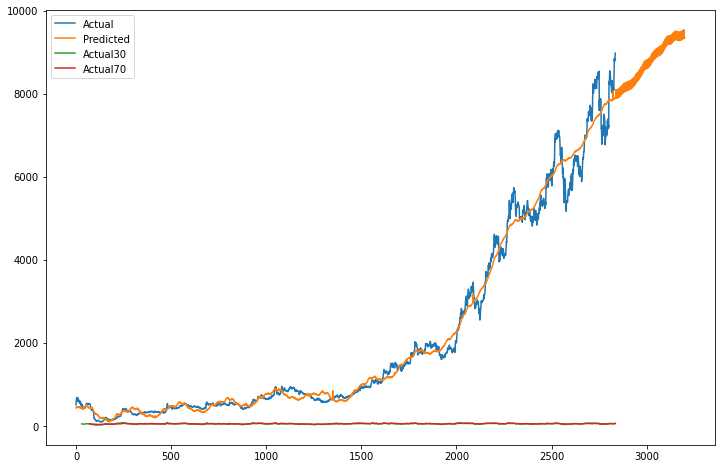

In [243]:
plt.figure(figsize=(12, 8))
y_true = df['y'].values
y_pred = forecast['yhat'].values
y_rsi = rsi
y_rsi1 = rsi1
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.plot(y_rsi, label='Actual30')
plt.plot(y_rsi1, label='Actual70')

plt.legend()
plt.show()

#EMA values

In [244]:
# Calculate EMA with a period of 10
ema_values1 = talib.EMA(df['y'].values, timeperiod=50)
ema_values2 = talib.EMA(df['y'].values, timeperiod=200)
ema_values3 = talib.EMA(df['y'].values, timeperiod=13)
ema_values4 = talib.EMA(df['y'].values, timeperiod=26)
# Combine the EMA values with the original dataframe
df['EMA50'] = ema_values1
df['EMA200'] = ema_values2
df['EMA13'] = ema_values3
df['EMA26'] = ema_values4
df1 = df.fillna(1)
df1

,ds,Symbol,Series,Prev Close,Open,High,Low,Last,y,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,RSI30,RSI70,EMA50,EMA200,EMA13,EMA26
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.1,509.10,548.85,...,1.726368e+14,1.0,908264,0.2888,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.0,554.65,572.15,...,2.488370e+14,1.0,677627,0.1558,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.0,640.95,618.37,...,2.837530e+14,1.0,774895,0.1689,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.5,632.40,659.60,...,2.982921e+14,1.0,1006161,0.2225,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.0,644.00,636.41,...,1.945929e+14,1.0,462832,0.1514,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,2019-11-06,BAJAJFINSV,EQ,8845.75,8800.00,8875.00,8721.05,8735.3,8772.85,8787.72,...,2.814732e+14,35973.0,63525,0.1983,61.447458,57.088152,8006.454851,7420.742835,8379.745516,8210.702399
2832,2019-11-07,BAJAJFINSV,EQ,8772.85,8798.00,8859.70,8762.05,8827.4,8832.90,8815.72,...,1.881124e+14,26266.0,46514,0.2180,62.085788,57.408470,8038.864465,7434.794150,8444.481871,8256.791111
2833,2019-11-08,BAJAJFINSV,EQ,8832.90,8795.00,8950.00,8750.00,8812.0,8818.85,8853.34,...,2.610886e+14,34977.0,52673,0.1786,61.837969,57.306933,8069.452133,7448.565850,8497.963032,8298.425102
2834,2019-11-11,BAJAJFINSV,EQ,8818.85,8799.00,8925.00,8775.00,8925.0,8903.30,8862.60,...,1.550760e+14,21337.0,37131,0.2122,62.762183,57.762464,8102.152049,7463.040817,8555.868313,8343.230650


In [248]:
# Create and fit the Prophet model with the regressor
m = Prophet()
m.add_regressor('EMA50')
m.fit(df)

# Create a dataframe with the dates you want to forecast
future = m.make_future_dataframe(periods=365)

# Add the RSI30 and RSI70 values for the future dates
future['EMA'] = df['EMA']

# Use the fitted model to make predictions for the future dates
forecast = m.predict(future)

ValueError: ignored